## 导入库文件

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import sklearn
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [26]:
data_train = pd.read_csv('F://Kaggle House/train.csv')

In [27]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 探索性数据分析

In [28]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
# 查看特征名称
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

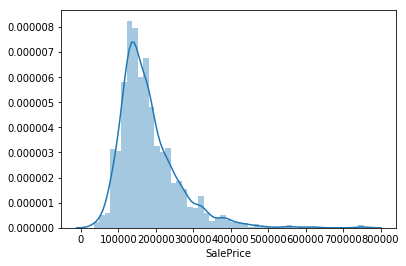

In [35]:
sns.distplot(data_train['SalePrice'])

### 类别+数值 箱型图

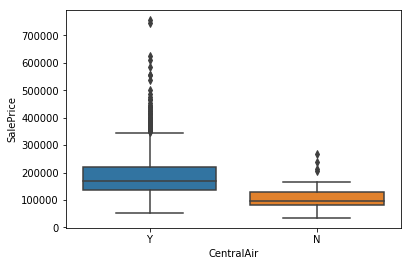

In [39]:
# 查看类别型特征和标签之间的关系  CentralAir 中央空调
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]],axis=1)
sns.boxplot(x=var, y='SalePrice', data=data)

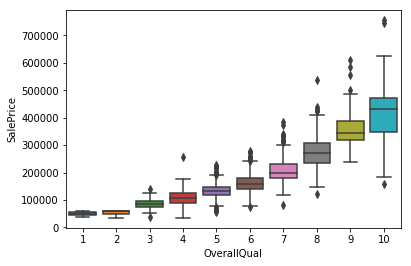

In [40]:
# 查看类别型特征和标签之间的关系 OverallQual 总体质量
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]],axis=1)
sns.boxplot(x=var, y='SalePrice', data=data)

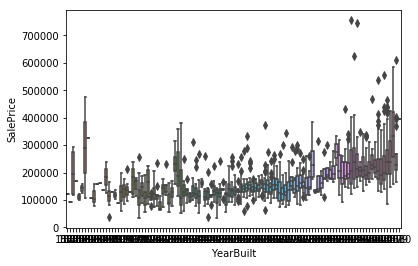

In [44]:
# 查看类别型特征和标签之间的关系 YearBuilt 修建年份
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]],axis=1)
sns.boxplot(x=var, y='SalePrice', data=data)

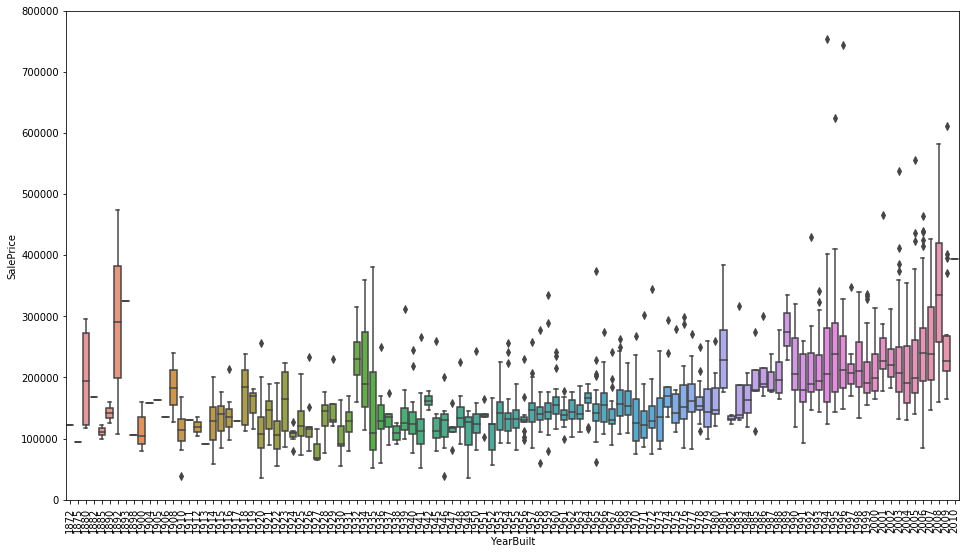

In [59]:
#修改图片尺寸
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]],axis=1)
fig, ax = plt.subplots(figsize=(16, 9))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymax=800000)
plt.xticks(rotation=90);

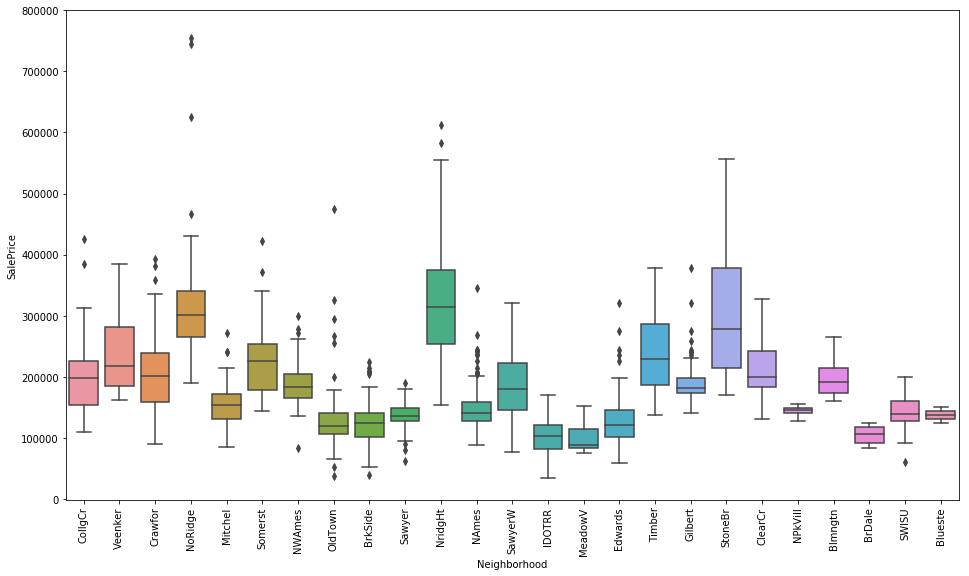

In [55]:
# 地段
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]],axis=1)
fig, ax = plt.subplots(figsize=(16, 9))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymax=800000)
plt.xticks(rotation=90);

### 数值+数值 散点图

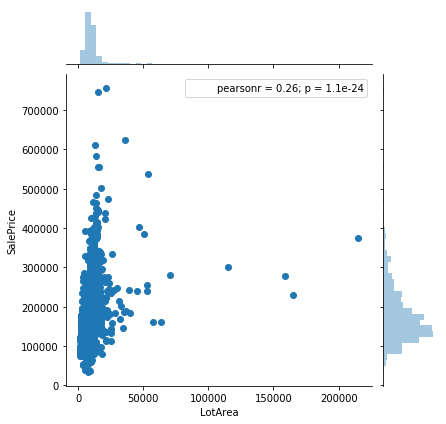

In [77]:
# 可以看到，该特征对标签的影响不大，可以丢弃
var = 'LotArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.jointplot(x=var, y='SalePrice', data=data)
plt.show()

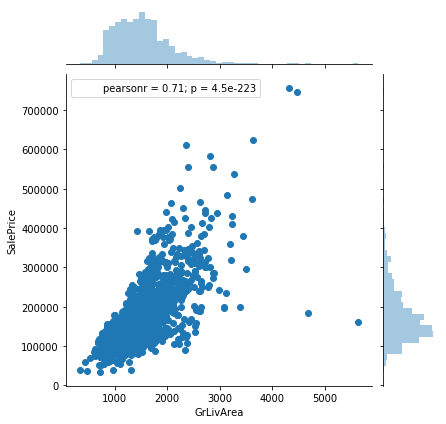

In [78]:
var  = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.jointplot(x=var, y='SalePrice', data=data)
plt.show()

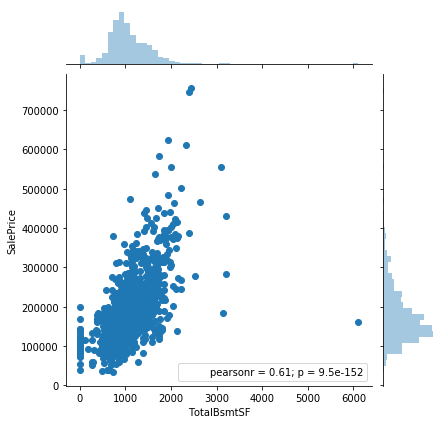

In [79]:
var  = 'TotalBsmtSF'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.jointplot(x=var, y='SalePrice', data=data)
plt.show()

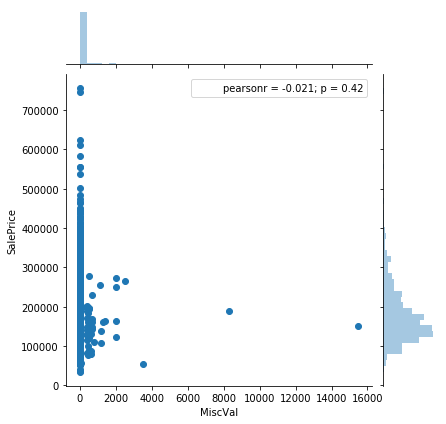

In [82]:
#丢弃
var  = 'MiscVal'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
sns.jointplot(x=var, y='SalePrice', data=data)
plt.show()

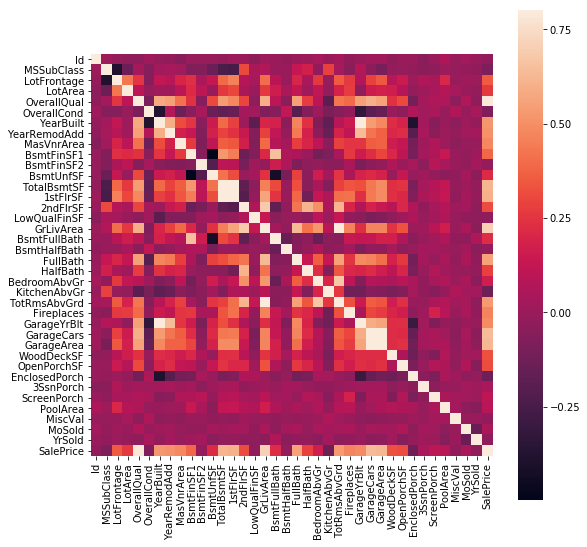

In [89]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data=corrmat, vmax=0.8, square=True)
plt.show()

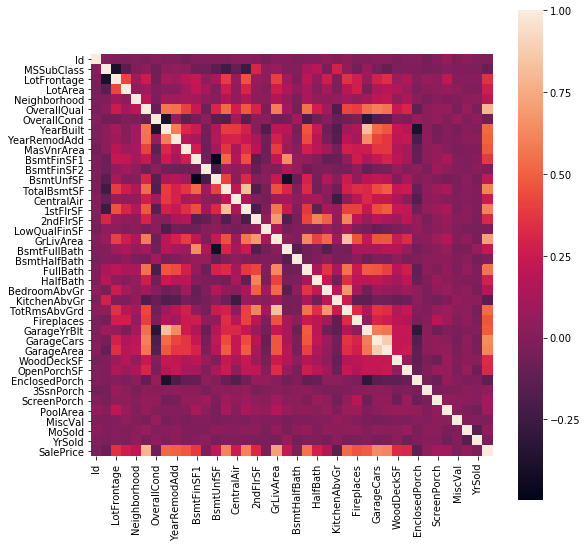

In [116]:
#将类别型变量转化成数字变量加入到corr当中
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corr = data_train.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data=corr, square=True)
plt.show()

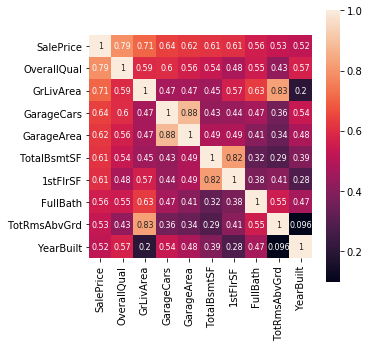

In [137]:
# 前十个最相关的数据的相关性热力图
ten = corr['SalePrice'].sort_values(ascending=False)[:10].index
corr = data_train[ten].corr()
plt.subplots(figsize=(5, 5))
sns.heatmap(data = corr, square=True, annot=True, annot_kws={'size':8})
plt.show()

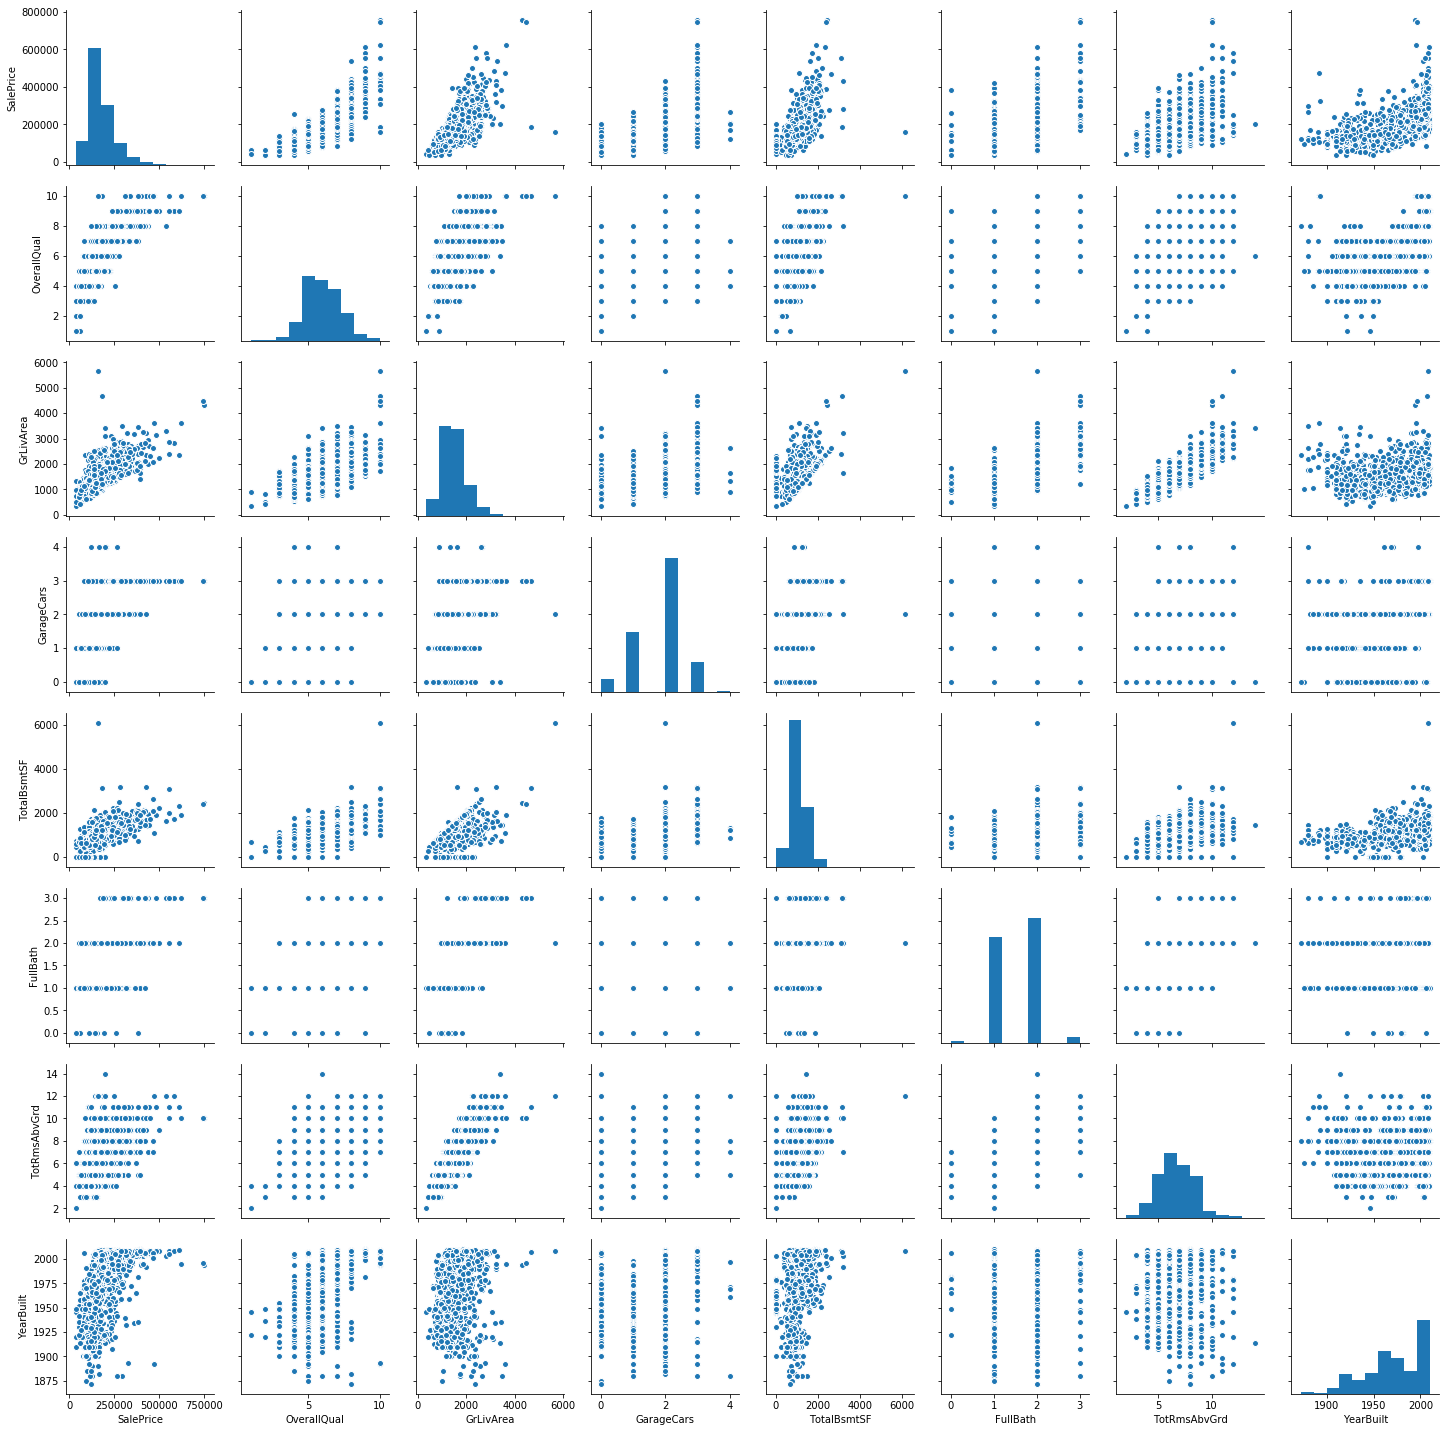

In [140]:
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data=data_train[cols])
plt.show()

## 训练模型

In [144]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

In [145]:
# 处理数据并划分验证集
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

### 模型选择

In [165]:
#选取多个模型进行试验， 可以看出随机森林的效果比较好
clfs = {'svm':svm.SVR(),
       'RandomForestRegressor':RandomForestRegressor(n_estimators = 400),
       'BayesianRidge':linear_model.BayesianRidge()      
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf, 'cost', str(np.sum(y_pred - y_test)/len(y_test)))
    except Exception as e:
        print(clf, 'Error:')
        print(e)

svm cost -17.96730634760857
RandomForestRegressor cost -2.872560591411934
BayesianRidge cost -17.19150469291162


In [273]:
cols = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

# 划分训练集和交叉验证集
X = data_train[cols].values
y = data_train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
# 训练模型，预测数据
clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [274]:
#打印误差
error = sum(abs(y_pred - y_test))/len(y_test)
error

19555.694518314052

## 检验测试集数据

In [265]:
rfr = clf
data_test = pd.read_csv('F://Kaggle House/test.csv')

In [267]:
#查看测试集中的缺失数据
X_test = data_test[cols]
X_test.isnull().sum().sort_values(ascending=False)

TotalBsmtSF     1
GarageCars      1
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
OverallQual     0
dtype: int64

In [268]:
#填充缺失值：平均值
X_test = X_test.fillna(X_test.mean())
X_test.isnull().sum().sort_values(ascending=True)

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [260]:
#做出预测
y_pred = rfr.predict(X_test)
print(y_pred)
print(y_pred.shape)
print(X_test.shape)

[118448.85416667 154547.375      167009.7225     ... 128951.
 120664.875      237569.3475    ]
(1459,)
(1459, 7)


In [271]:
#整合成标准的提交形式：Id 预测值
prediction = pd.DataFrame(y_pred, columns = ['SalePrice'])
result = pd.concat([data_test['Id'], prediction], axis=1)

In [272]:
# 导出文件
result.to_csv('F://Predictions.csv', index=False)